# Intuition on Convolutions

**Objectives**
- Compute convolution operations
- Visualize a convolution kernel
- VIsualize the effect of a convolution on images

<hr>
<hr>

**Convolutional Neural Networks** correspond the Neural Networks that are specially designed to work on images. 

This is made possible thanks to _convolutions_. This specific mathematical operations applies a _kernel_ to an input image and creates an output representation. The name of this output can change depending on the community. Here, let's talk about the output as it corresponds to the output of a layer, as in standard DL neurons. But it can also be "convoluted representation/feature", "convolution", or also "activation" as it corresponds to the activation of a given layer.

<img src="convolution.png" width="300">

⚠️ It is important to get that the same kernel, i.e. the same weights, are applied to different zones of the images. This is very different from standard DL operations where each weight of each neuron is related to only one input coordinate (which in this case would be each pixel). Here, the weight of a kernel is not applied to only one input, i.e. one pixel, but to different pixels, "step by step".

You can think of each kernel (or each filter in case of color image) as a magnifying glass through which you see the image. Similarly to your eyes which have to do not capture everything at once, but that have to look at different parts before to capture the whole thing you are looking at.

So let's see a bit deeper at convolutions in general, and their impact in Convolutional Neural Networks.

## Data

❓ First use the following function to load the data. 

⚠️ Restrict any desire to change the shapes or types of the outputs, this can arm further questions.

In [1]:
import os
import numpy as np

from matplotlib.pyplot import imread

import matplotlib.pyplot as plt
%matplotlib inline

def load_data(path):
    nb_circles = 100
    nb_triangles = 100
    
    X, y = [], []
    
    for i in range(nb_circles):
        c_path = os.path.join(path, 'circles', f'circle_{i}.png')
        X.append(imread(c_path)[:, :, :1])
        y.append(0)
    
    for i in range(nb_triangles):
        t_path = os.path.join(path, 'triangles', f'triangle_{i}.png')
        X.append(imread(t_path)[:, :, :1])
        y.append(1)
        
    c = list(zip(X, y))
    np.random.shuffle(c)
    X, y = zip(*c)
        
    return np.array(X), np.array(y)
        
X, y = load_data('data')
# Replace data by "https://wagon-public-datasets.s3.amazonaws.com/deep-learning-circles-triangles" if you are on a server

❓ Check the shape of your data. Especially, why an additional dimension of size 1 for `X`? 

<details>
    <summary>Hints</summary>

The last dimension corresponds to the grey (black & white) channel - contrary to RGB images that 
have 3 channels, one for each color
</details>

In [2]:
X.shape, y.shape  # ===> to code the grey channel

((200, 76, 78, 1), (200,))

❓ Do the input images need some normalization?

In [3]:
X.max(), X.min()  # ===> Might be centered by substracting 0.5 e.g X = X-0.5

(1.0, 0.0)

❓ Display some images with `plt.imshow` and their respective label (the images are black and white, therefore use `cmap=gray` in the dedicated matplotlib function - otherwise, you will get unrelevant and weird colors).

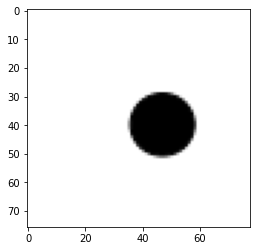

In [4]:
num = np.random.randint(0, len(X))

plt.imshow(X[num,:,:,:], cmap='gray');

❓ How many classes to predict are there? It should already give you an information on the last layer of your CNN.

In [5]:
n_classes = 2

# Part 1. Kernels

The following function allows to apply a kernel to an image => a convolution. 

⚠️ Be careful though as _convolution_ operation are slighlty different in signal processing. For instance, the numpy.convolve function does not compute the convolution in the Deep Learning sense.

⚠️ Keras convolutions are a bit more complex as they deal with padding and slide. This is a simplified example.

⚠️ Be careful: convolution sometimes refers to _one_ operation. Sometimes to the operations repeated on the entire image.

❓ Load the function and go through the lines to understand what it is doing.

In [6]:
def compute_convolution(img, kernel):
    # Parameters
    kernel = np.array(kernel)
    kernel_height, kernel_width = kernel.shape

    img = np.squeeze(img) # Removes dimensions of size 1
    img_height, img_width = img.shape
    
    array = []

    for x in range(img_height-kernel_height):
        arr = []
        
        for y in range(img_width - kernel_width):
            
            a = np.multiply(img[x:x+kernel_height, y:y+kernel_width], kernel)
            arr.append(a.sum())
            
        array.append(arr)
        
    return array

❓ Apply the convolution with the following kernel to any image from the input dataset. Display the input and output image to see the difference

In [7]:
identity_kernel = [
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
]

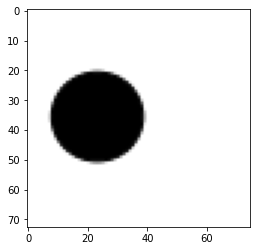

In [8]:
num = np.random.randint(0, len(X))

plt.imshow(compute_convolution(X[num,:,:,:], identity_kernel), cmap='gray');

The previous kernel corresponds to the _identity_ kernel, meaning that the output is equal to the output... It basically does nothing. You can easily figure this out by thinking about the operation it does on the image : only one pixel per convolution operation is kept as the other are multiplied by 0.

❓ `plot_convolution` with the following `kernel_1`, once on an triangle and once on a circle.

In [9]:
kernel_1 = [
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
]

def plot_convolution(img, kernel, activation=False):
    ''' The following printing function ease the visualization'''
    
    img = np.squeeze(img)
    output_img = compute_convolution(img, kernel)
    if activation:
        output_img = np.maximum(output_img, 0)
    
    plt.figure(figsize=(10, 5))
    
    ax1 = plt.subplot2grid((3,3),(0,0), rowspan=3)
    ax1.imshow(img, cmap='gray')
    ax1.title.set_text('Input image')
    
    ax2 = plt.subplot2grid((3,3),(1, 1))
    ax2.imshow(kernel, cmap='gray')
    ax2.title.set_text('Kernel')    
    
    ax3 = plt.subplot2grid((3,3),(0, 2), rowspan=3)
    ax3.imshow(output_img, cmap='gray')
    ax3.title.set_text('Output image')    

    for ax in [ax1, ax2, ax3]:
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)

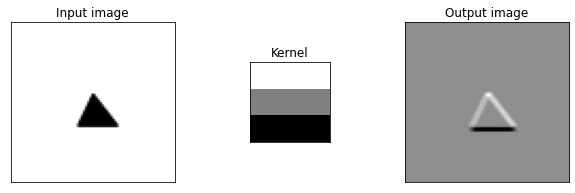

In [10]:
num = np.random.randint(0, len(X))

plot_convolution(X[num,:,:,:], kernel_1)

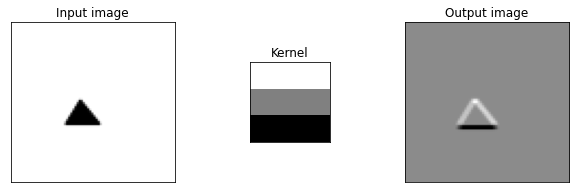

In [11]:
num = np.random.randint(0, len(X))

plot_convolution(X[num,:,:,:], kernel_1)

❓ Let's try to understand why this is meaningful. First, white colors correspond to high values and black to low values. In a neural network, just after a regular neuron or a convolution, there is an activation function. When the activation function is a `relu`, it just correponds to setting the negative values to 0.

Well, let's see what it means in the case of a CNN. Re-run the previous functions with `activation` set to `True` (in this case, the activation fuction _is_ the relu).

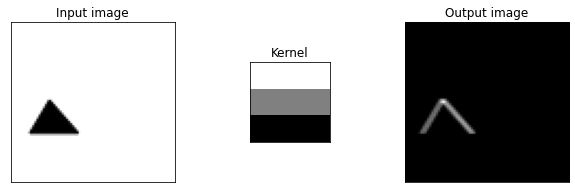

In [12]:
num = np.random.randint(0, len(X))

plot_convolution(X[num,:,:,:], kernel_1, True)

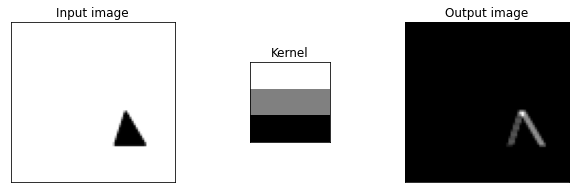

In [13]:
num = np.random.randint(0, len(X))

plot_convolution(X[num,:,:,:], kernel_1, True)

❓ This kernel is actually highlithing the edges in a given direction. Try the next following kernels to check the different edges it can detect.

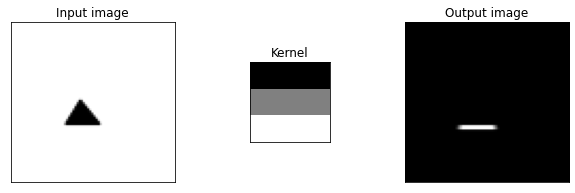

In [14]:
kernel_2 = [
    [-1, -1, -1],
    [0, 0, 0],   
    [1, 1, 1],
]

kernel_3 = [
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
]

kernel_4 = [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]

num = np.random.randint(0, len(X))
plot_convolution(X[num,:,:,:], kernel_2, True)

In [15]:
# ====> bottom edge is detected

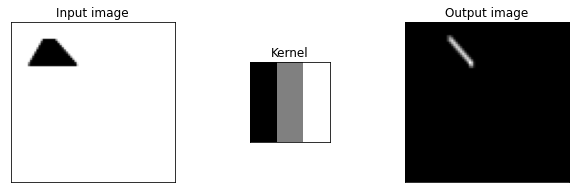

In [16]:
num = np.random.randint(0, len(X))
plot_convolution(X[num,:,:,:], kernel_3, True)

In [17]:
# ====> right edge is detected

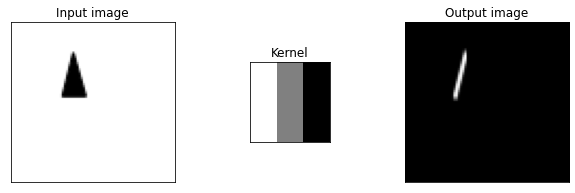

In [18]:
num = np.random.randint(0, len(X))
plot_convolution(X[num,:,:,:], kernel_4, True)

In [19]:
# ====> left edge is detected

❓ What the effect of kernel size? Check it out with a larger kernel of shape (10,10) below

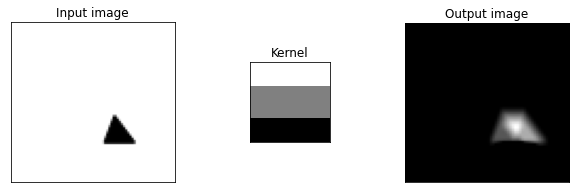

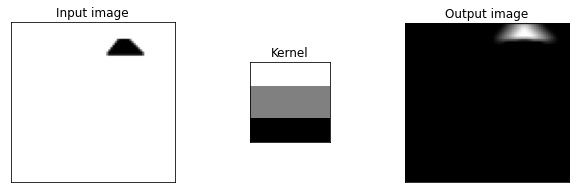

In [20]:
kernel_big = np.array([
    np.ones((10,)),
    np.ones((10,)),
    np.ones((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.zeros((10,)),
    np.ones((10,))*-1,
    np.ones((10,))*-1,
    np.ones((10,))*-1,
])
pass  # YOUR CODE HERE

In [21]:
# ===> This enlarges the detected edge by repeating the operation.

❓ Feel free to try any other kernel

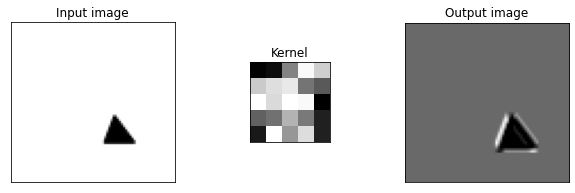

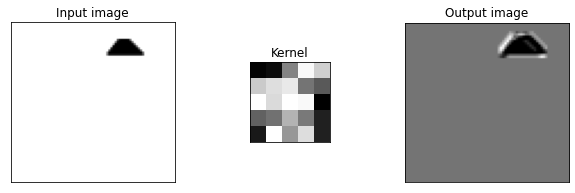

In [22]:
random_kernel = np.random.uniform(-10, 10, (5, 5))
pass  # YOUR CODE HERE

Now that you got the idea of what the convolution is doing, let's see how it goes in a real Convolutional Neural Network.

# Part 2. Convolutional Neural Network


❓ Write a convolutional network that has 
- a convolutional layer with 16 filters with (4, 4) kernels.
- a convolutional layer with 32 filters with (3, 3) kernels.
- a convolutional layer with 32 filters with (3, 3) kernels.
- a convolutional layer with 32 filters with (2, 2) kernels.

with:
- A max-pooling layer (with (2, 2) pool sizes) after each convolution.
- A Dense layer of the size of your choice - be reasonable - after the flattening and before the last layer


Also, be sure to compile your model with the adequate parameters

In [23]:
from tensorflow.keras import layers, models

In [24]:
input_shape = X.shape[1:]
input_shape

(76, 78, 1)

In [25]:
type(input_shape)

tuple

In [26]:
def initialize_model():
    model = models.Sequential()
    
    model.add(layers.Conv2D(filters=16, kernel_size=(4,4), input_shape=input_shape, activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    
    model.add(layers.Flatten())

    model.add(layers.Dense(25, activation='relu'))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [27]:
model = initialize_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 75, 16)        272       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 37, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 35, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          4

❓ Fit the model. You should achieve a accuracy of at least 90. Here, the point is not to bother with overfitting, so do not worry much as you would have to if you have a high score. 

In [28]:
model.fit(X, y, epochs=5)

Epoch 1/5
7/7 [==============================] - 2s 106ms/step - loss: 0.6948 - accuracy: 0.5191
Epoch 2/5
7/7 [==============================] - 1s 109ms/step - loss: 0.6727 - accuracy: 0.5378
Epoch 3/5
7/7 [==============================] - 1s 157ms/step - loss: 0.6435 - accuracy: 0.6119
Epoch 4/5
7/7 [==============================] - 1s 132ms/step - loss: 0.5804 - accuracy: 0.7543
Epoch 5/5
7/7 [==============================] - 1s 162ms/step - loss: 0.4525 - accuracy: 0.8653


## 2.1 Kernels

It is possible to retrieve the values of the different kernels in the CNN. Look at the following method that will return the value of a kernel depending on:
- the layer number, which can be only `0 `or `2`, as the convolution layers correspond to the first and third layer of the CNN
- the filter number, where there is 32 filters in the first convolution, and 64 filters in the second convolution
- the channel number, where there is 1 channel in the first convolution, and 32 channels in the second convolution


❓  Using `plot_convolution(activation=True)`, display some kernels from the FIRST convolutional layer, along with the activation output, to see what the model has learnt

In [29]:
def get_kernel(layer_number, filter_number, channel_number):

    weight_or_bias = 0
    k = model.layers[layer_number].weights[0].numpy()[:,
                                                      :,
                                                      channel_number,
                                                      filter_number]
    return k

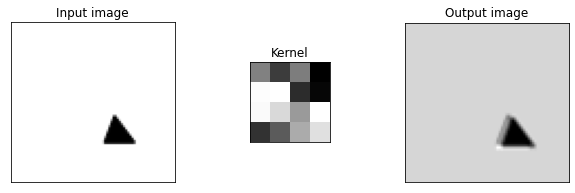

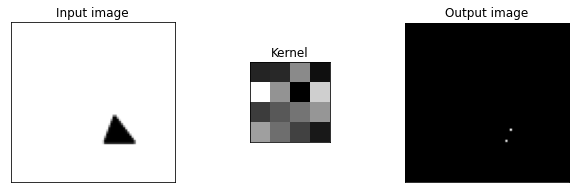

In [30]:
plot_convolution(X[0], get_kernel(0, 11, 0), True)
plot_convolution(X[0], get_kernel(0, 9, 0), True)

## 2.2 Activations

So far, we have only looked at the activation ("output image") of the **first** layer.

In order to visualize the activation of the CNN after the second convolution, we need to compute the activations after the first layer, then compute the MaxPooling, then second convolution activation, etc...

We give you below a function below which does exactly that: It computes the different activation through the entire network, and store them in an list. Notice that it uses keras `Fonctional API`

❓ Run the following cell. The function allows to directly print the activation after any layer

In [31]:
# List all 9 layers
layer_outputs = [layer.output for layer in model.layers]

# Instanciate 9 sub-models: [layer1, layer1-->layer2, layer1-->layer2-->layer3, ...]
# Reusing already trained weights and biases
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Compute the 9 output of each sub-models
activations = activation_model.predict(X) 

def get_activation(activations, image_number, layer_number, filter_number):
    '''return activation map for a given layer, image, and filter number'''
    return activations[layer_number][image_number][:, :, filter_number]

❓ Choose one image, and display the 3 activation "images" of each 3 convolution layers. Pick for instance the first filter of each layer. 
- Notice how the information of an image **flows** within the network.
- You should see picture become more and more "abstract", of smaller and smaller "dimensions"

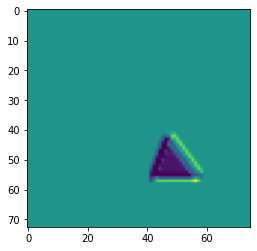

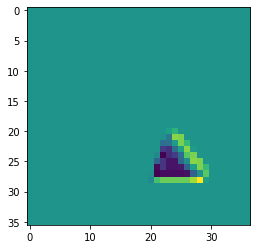

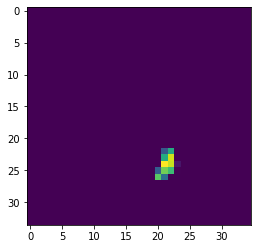

In [32]:
plt.imshow(get_activation(activations, 0, 0, 0))
plt.show()
plt.imshow(get_activation(activations, 0, 1, 0))
plt.show()
plt.imshow(get_activation(activations, 0, 2, 0));

🏁 **Congratulation! Don't forget to commit and push your notebook** 

### Utils (appendix)

The following simply presents the functions that created the dataset you are working with.

They were left at the end of the notebook in case you want to further prototype and get better understanding of what is going on. But do not prototype yet => you can go to the next exercise as for now, and come back to it any time later.

In [33]:
def draw_triangle():
    dx = np.random.uniform(0.1, 0.3)
    dy = np.random.uniform(0.1, 0.3)
    noise_x = np.random.uniform(0.0, 0.1)
    noise_y = np.random.uniform(0.0, 0.1)    
    
    x = np.random.uniform(0, 1-dx-noise_x)
    y = np.random.uniform(0, 1-dy)
    X = np.array([[x,y], [x+dx+noise_x,y], [x+dx/2, y+dy+noise_y]])

    t1 = plt.Polygon(X, color='black')
    plt.gca().add_patch(t1)
    
def draw_circle():
    r = np.random.uniform(0.1, 0.25)
    x = np.random.uniform(0+r, 1-r)
    y = np.random.uniform(0+r, 1-r)

    circle1 = plt.Circle((x, y), r, color='black')
    plt.gcf().gca().add_artist(circle1)
    
def create_image(form, path):
    plt.figure(figsize=(1, 1))
    if form == 'circle':
        draw_circle()
    elif form == 'triangle':
        draw_triangle()
    plt.axis('off')
    plt.savefig(path, dpi=80, bbox_inches='tight')
    plt.close()

    
def create_images(path):
    nb_circles = 100
    nb_triangles = 100
    
    for i in range(nb_circles):
        c_path = os.path.join(path, 'circles', f'circle_{i}.png')
        create_image('circle', c_path)
        
    for i in range(nb_triangles):
        t_path = os.path.join(path, 'triangles', f'triangle_{i}.png')
        create_image('triangle', t_path)